# 🧼 Limpeza dos dados 

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cancer_df = pd.read_csv('cancer_data_eng.csv', encoding='ISO-8859-1')

#Filtrar colunas que irei utilizar
cancer_df = cancer_df[['Gender', 'Age', 'Raca.Color', 'Degree.of.Education', 'Name.Occupation', 'Description.of.Topography']]
cancer_df.columns = ['Gênero', 'Idade', 'Cor_Raça', 'Grau_Educação', 'Nome_Ocupação', 'Descrição_Topografia']

cancer_df

C:\Users\gabri\AppData\Local\Temp\ipykernel_19276\3613798149.py:5: DtypeWarning: Columns (3,5,6,7,8,9,10,13,14,23,24,25,27,28,29,30,31,32,33,34,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  cancer_df = pd.read_csv('cancer_data_eng.csv', encoding='ISO-8859-1')


,Gênero,Idade,Cor_Raça,Grau_Educação,Nome_Ocupação,Descrição_Topografia
0,MASCULINO,30.0,BRANCO,NaN,TRABALHADORES NOS SERVIÇOS DE EMBELEZAMENTO E ...,"RETO, SOE"
1,FEMININO,53.0,NaN,NaN,SEM INFORMAÇÃO\t,COLON DESCENDENTE
2,FEMININO,51.0,PARDA,NaN,SEM INFORMAÇÃO\t,"MAMA , SOE"
3,FEMININO,73.0,NaN,NaN,SEM INFORMAÇÃO\t,PELE DO MEMBRO SUPERIOR E DO OMBRO
4,MASCULINO,71.0,BRANCO,NaN,SEM INFORMAÇÃO\t,"LOCALIZACAO PRIMARIA DESCONHECIDA, SOE"
...,...,...,...,...,...,...
1778171,MASCULINO,45.0,NaN,NaN,SEM INFORMAÇÃO\t,PELE DE OUTRAS PARTES DA FACE
1778172,MASCULINO,61.0,NaN,NaN,SEM INFORMAÇÃO\t,PELE DE OUTRAS PARTES DA FACE
1778173,MASCULINO,41.0,PARDA,NaN,SEM INFORMAÇÃO\t,"RETO, SOE"
1778174,MASCULINO,82.0,NaN,NaN,SEM INFORMAÇÃO\t,"PULMAO, SOE"


In [5]:
#Filtrando a coluna de tipos de cancer para somente os cancers de pele
cancer_df = cancer_df[cancer_df['Descrição_Topografia'].str.contains('pele', case=False)].reset_index(drop=True)
cancer_df

,Gênero,Idade,Cor_Raça,Grau_Educação,Nome_Ocupação,Descrição_Topografia
0,FEMININO,73.0,NaN,NaN,SEM INFORMAÇÃO\t,PELE DO MEMBRO SUPERIOR E DO OMBRO
1,MASCULINO,76.0,NaN,NaN,SEM INFORMAÇÃO\t,PELE DO MEMBRO INFERIOR E DO QUADRIL
2,FEMININO,78.0,BRANCO,NaN,SEM INFORMAÇÃO\t,PELE DE OUTRAS PARTES DA FACE
3,MASCULINO,71.0,NaN,NaN,SEM INFORMAÇÃO\t,PELE DE OUTRAS PARTES DA FACE
4,MASCULINO,59.0,NaN,NaN,SEM INFORMAÇÃO\t,PELE DE OUTRAS PARTES DA FACE
...,...,...,...,...,...,...
370321,FEMININO,55.0,BRANCO,NaN,SEM INFORMAÇÃO\t,PELE DO TRONCO
370322,MASCULINO,78.0,BRANCO,NaN,SEM INFORMAÇÃO\t,"PELE DO LABIO, SOE"
370323,FEMININO,56.0,BRANCO,NaN,SEM INFORMAÇÃO\t,PELE DE OUTRAS PARTES DA FACE
370324,MASCULINO,45.0,NaN,NaN,SEM INFORMAÇÃO\t,PELE DE OUTRAS PARTES DA FACE


In [12]:
# Substituir NaN e 'Sem informação' por 0 em todo o DataFrame
cancer_df.replace({pd.NA: 0, 'SEM INFORMAÇÃO\t': 0}, inplace=True)
cancer_df

,Gênero,Idade,Cor_Raça,Grau_Educação,Nome_Ocupação,Descrição_Topografia
0,FEMININO,73.0,0,0,0,PELE DO MEMBRO SUPERIOR E DO OMBRO
1,MASCULINO,76.0,0,0,0,PELE DO MEMBRO INFERIOR E DO QUADRIL
2,FEMININO,78.0,BRANCO,0,0,PELE DE OUTRAS PARTES DA FACE
3,MASCULINO,71.0,0,0,0,PELE DE OUTRAS PARTES DA FACE
4,MASCULINO,59.0,0,0,0,PELE DE OUTRAS PARTES DA FACE
...,...,...,...,...,...,...
370321,FEMININO,55.0,BRANCO,0,0,PELE DO TRONCO
370322,MASCULINO,78.0,BRANCO,0,0,"PELE DO LABIO, SOE"
370323,FEMININO,56.0,BRANCO,0,0,PELE DE OUTRAS PARTES DA FACE
370324,MASCULINO,45.0,0,0,0,PELE DE OUTRAS PARTES DA FACE


# 🔍 Análise geral 

In [13]:
#Verificando os tipos de dados
cancer_df.dtypes 

Gênero                   object
Idade                   float64
Cor_Raça                 object
Grau_Educação            object
Nome_Ocupação            object
Descrição_Topografia     object
dtype: object

In [15]:
#Verificando quantas respostas possuem 
nRow, nCol = cancer_df.shape
print(f'O dataframe possui {nRow} linhas e {nCol} colunas')

O dataframe possui 370326 linhas e 6 colunas


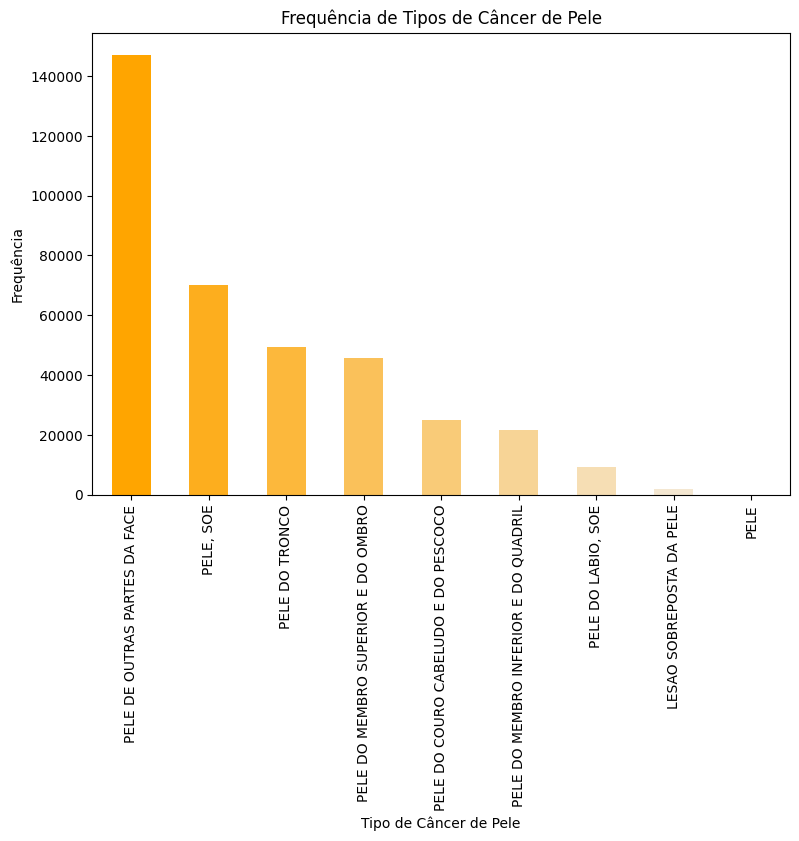

In [16]:
# Contar a frequência de cada tipo de câncer de pele
contagem_tipos = cancer_df['Descrição_Topografia'].value_counts()

# Criar uma paleta de cores mais escura com a cor base "orange" e intensidade proporcional à contagem
cores_alaranjadas = sns.light_palette("Orange", as_cmap=False, reverse=True, n_colors=len(contagem_tipos))

# Criar o gráfico de barras
plt.figure(figsize=(9, 6))
contagem_tipos.plot(kind='bar', color=cores_alaranjadas)

# Adicionar rótulos e título
plt.title('Frequência de Tipos de Câncer de Pele')
plt.xlabel('Tipo de Câncer de Pele')
plt.ylabel('Frequência')

# Mostrar o gráfico
plt.show()

# 🧬 Gênero

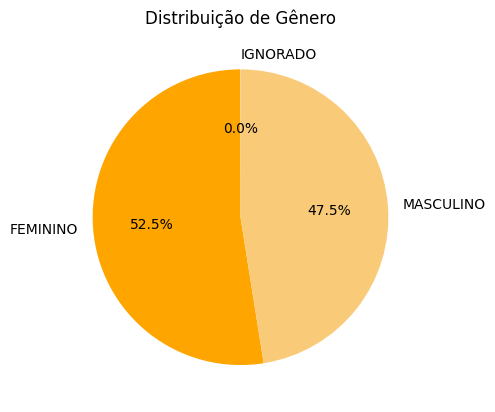

In [17]:
# Contando a quantidade de 'Feminino' e 'Masculino'
contagem_genero = cancer_df['Gênero'].value_counts()

# Criar uma paleta de cores mais escura com a cor base "orange" e intensidade proporcional à contagem
cores_alaranjadas = sns.light_palette("Orange", as_cmap=False, reverse=True, n_colors=len(contagem_genero))

# Criando o gráfico de pizza
plt.pie(contagem_genero, labels=contagem_genero.index, autopct='%1.1f%%', startangle=90, colors=cores_alaranjadas)

# Adicionando título
plt.title('Distribuição de Gênero')

# Exibindo o gráfico
plt.show()

### Podemos perceber que de 370326 pacientes, 52.5% são do sexo feminino, ou seja, a maioria do público que possui algum tipo de câncer de pele são mulheres, enquanto 47.5% são do sexo masculino. 

# 🌈 Cor de pele

In [19]:
# Contar a quantidade de zeros na coluna 'Raca' ou 'Color'
contagem_zeros = (cancer_df['Cor_Raça'] == 0).sum()

# Mostrar o resultado
print(f"A quantidade de pessoas que deixaram em branco a cor é: {contagem_zeros}")


A quantidade de pessoas que deixaram em branco a cor é: 209103


### Como há muita quantidade de dados em nulos, iremos excluir eles para que possamos ter uma melhor visualização das outras respostas.

In [21]:
# Excluir todas as linhas em que a coluna 'MinhaColuna' contém o valor 0
cancer_df = cancer_df[cancer_df['Cor_Raça'] != 0]
cancer_df

,Gênero,Idade,Cor_Raça,Grau_Educação,Nome_Ocupação,Descrição_Topografia
2,FEMININO,78.0,BRANCO,0,0,PELE DE OUTRAS PARTES DA FACE
5,MASCULINO,72.0,BRANCO,0,0,PELE DO COURO CABELUDO E DO PESCOCO
8,MASCULINO,67.0,BRANCO,0,SUPERVISORES DA EXTRAÇÃO MINERAL E DA CONSTRUÇ...,PELE DE OUTRAS PARTES DA FACE
10,FEMININO,42.0,BRANCO,0,0,PELE DO MEMBRO INFERIOR E DO QUADRIL
11,MASCULINO,56.0,BRANCO,0,0,PELE DE OUTRAS PARTES DA FACE
...,...,...,...,...,...,...
370319,MASCULINO,39.0,BRANCO,0,0,"PELE DO LABIO, SOE"
370320,FEMININO,86.0,BRANCO,0,0,PELE DO TRONCO
370321,FEMININO,55.0,BRANCO,0,0,PELE DO TRONCO
370322,MASCULINO,78.0,BRANCO,0,0,"PELE DO LABIO, SOE"


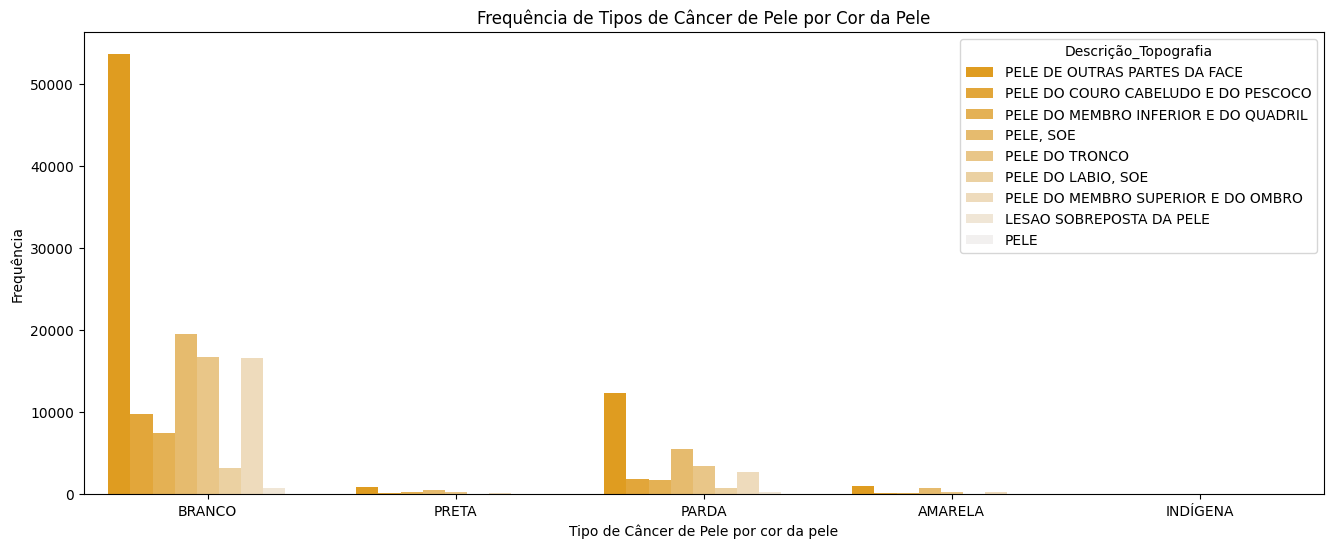

In [30]:
# Criar uma paleta de cores mais escura com a cor base "orange" e intensidade proporcional à contagem
cores_alaranjadas = sns.light_palette("Orange", as_cmap=False, reverse=True, n_colors=len(contagem_tipos))

# Criar o gráfico de barras agrupado
plt.figure(figsize=(16, 6))
sns.countplot(data=cancer_df, x='Cor_Raça', hue='Descrição_Topografia', palette=cores_alaranjadas)

# Adicionar rótulos e título
plt.title('Frequência de Tipos de Câncer de Pele por Cor da Pele')
plt.xlabel('Tipo de Câncer de Pele por cor da pele')
plt.ylabel('Frequência')

# Mostrar o gráfico
plt.show()

### Assim, é notório que o câncer de pele afeta mais as pessoas brancas e pardas, sendo o câncer de pele de outras partes da face e o sem especificação os mais aparentes.

# ✍🏻 Grau de Educação e Nome da Ocupação